# WeatherPy
----

In [1]:
import pandas as pd
import json
import requests
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime

from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
# Define city list
city_list=[]

# Loop through random coordinates to generate city list
for city in range(2000):
    lat=random.randrange(-90,90)
    lng=random.randrange(-180,180)
    city = citipy.nearest_city(lat,lng)
    city_list.append(city.city_name)
# Check city list length
len(city_list)

2000

In [3]:
# Drop duplicate cities from city list
city_list = list(set(city_list))

# Check city list length with out duplicate cities
len(city_list)

755

In [4]:
# Define lists for city data
City=[]
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

#data={"City":[City],"Lat":[Lat],"Lng":[Lng],"Max_Temp":[Max_Temp],"Humidity":[Humidity],"Cloudiness":[Cloudiness],"Wind_Speed":[Wind_Speed],"Country":[Country],"Date":[Date]}


In [5]:
# Set weather api url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define city to test weather api url
city="petaluma"   
    
query_url = url + "appid=" + weather_api_key + "&q=" + city
print(f"Getting data for {city}")
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

Getting data for petaluma


{'coord': {'lon': -122.64, 'lat': 38.23},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 285.6,
  'feels_like': 284.61,
  'temp_min': 284.26,
  'temp_max': 287.04,
  'pressure': 1015,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 1.61, 'deg': 281},
 'clouds': {'all': 75},
 'dt': 1601027054,
 'sys': {'type': 1,
  'id': 5152,
  'country': 'US',
  'sunrise': 1601042485,
  'sunset': 1601085753},
 'timezone': -25200,
 'id': 5382232,
 'name': 'Petaluma',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [6]:
# Define weather api url
url = "http://api.openweathermap.org/data/2.5/weather?"

# City counter 
x=1

# Store today's date 
today= datetime.date.today()
date=today.strftime("%m/%d/%Y")

# Loop through city_list to retrieve city data from weather api url
for city in city_list:    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "imperial"
    try:
        print(f"Getting data for city #{x}|{city}")
        
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        City.append(weather_json['name'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Humidity.append(weather_json['main']['humidity'])
        Cloudiness.append(weather_json['clouds']['all'])
        Wind_Speed.append(weather_json['wind']['speed'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        x=x+1
    except:
        print("data not found")

Getting data for city #1|harper
Getting data for city #2|broken hill
Getting data for city #3|capreol
Getting data for city #4|sorvag
data not found
Getting data for city #4|auki
Getting data for city #5|yeppoon
Getting data for city #6|karlshamn
Getting data for city #7|nikolskoye
Getting data for city #8|saint-philippe
Getting data for city #9|lamar
Getting data for city #10|telde
Getting data for city #11|saint-joseph
Getting data for city #12|valdez
Getting data for city #13|fernie
Getting data for city #14|mangai
Getting data for city #15|bar harbor
Getting data for city #16|thompson
Getting data for city #17|kizukuri
Getting data for city #18|kaiu
Getting data for city #19|half moon bay
Getting data for city #20|esna
Getting data for city #21|ballangen
Getting data for city #22|newcastle
Getting data for city #23|moindou
Getting data for city #24|fergus falls
Getting data for city #25|esperance
Getting data for city #26|rawson
Getting data for city #27|santa vitoria do palmar
Get

Getting data for city #212|sabancuy
Getting data for city #213|calgary
Getting data for city #214|kimbe
Getting data for city #215|minas
Getting data for city #216|heihe
Getting data for city #217|mahebourg
Getting data for city #218|pergamino
Getting data for city #219|shingu
Getting data for city #220|shimoda
Getting data for city #221|whitehorse
Getting data for city #222|sioux lookout
Getting data for city #223|kiama
Getting data for city #224|ambunti
Getting data for city #225|samalaeulu
data not found
Getting data for city #225|port-gentil
Getting data for city #226|nhulunbuy
Getting data for city #227|tiznit
Getting data for city #228|santiago de cao
Getting data for city #229|panama city
Getting data for city #230|akureyri
Getting data for city #231|cairns
Getting data for city #232|santa maria
Getting data for city #233|tambacounda
Getting data for city #234|blejoi
Getting data for city #235|barela
Getting data for city #236|muisne
Getting data for city #237|mogadishu
Getting 

Getting data for city #414|ust-nera
Getting data for city #415|jatiroto
Getting data for city #416|morgan city
Getting data for city #417|bontang
Getting data for city #418|itaqui
Getting data for city #419|toftir
data not found
Getting data for city #419|killybegs
Getting data for city #420|placido de castro
Getting data for city #421|ilulissat
Getting data for city #422|heerenveen
Getting data for city #423|wadi musa
Getting data for city #424|sao joao da barra
Getting data for city #425|praia da vitoria
Getting data for city #426|barnstaple
Getting data for city #427|srednekolymsk
Getting data for city #428|umm durman
data not found
Getting data for city #428|hihifo
data not found
Getting data for city #428|salina cruz
Getting data for city #429|lobito
Getting data for city #430|valparaiso
Getting data for city #431|lahaina
Getting data for city #432|waitati
Getting data for city #433|sorong
Getting data for city #434|verkhoturye
Getting data for city #435|matagami
Getting data for 

Getting data for city #610|skjervoy
Getting data for city #611|vagur
Getting data for city #612|olafsvik
Getting data for city #613|morondava
Getting data for city #614|andros
Getting data for city #615|ca mau
Getting data for city #616|illoqqortoormiut
data not found
Getting data for city #616|dukat
Getting data for city #617|pevek
Getting data for city #618|liverpool
Getting data for city #619|mujiayingzi
Getting data for city #620|port lincoln
Getting data for city #621|albany
Getting data for city #622|georgetown
Getting data for city #623|katherine
Getting data for city #624|upernavik
Getting data for city #625|moron
Getting data for city #626|bougouni
Getting data for city #627|whitley bay
Getting data for city #628|marsa matruh
Getting data for city #629|great falls
Getting data for city #630|faanui
Getting data for city #631|flinders
Getting data for city #632|barawe
data not found
Getting data for city #632|keningau
Getting data for city #633|linguere
Getting data for city #63

In [7]:
# Create dataframe from city data
data={"City":City,"Lat":Lat,"Lng":Lng,"Max_Temp":Max_Temp,"Humidity":Humidity,"Cloudiness":Cloudiness,"Wind_Speed":Wind_Speed,"Country":Country,"Date":Date}
data_df=pd.DataFrame(data, columns=['City','Lat','Lng','Max_Temp','Humidity','Cloudiness','Wind_Speed','Country','Date'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Export city data into .csv file
data_df.to_csv (r'..\output_data\cities_data.csv', index = False, header=True)

# Display dataframe
data_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Harper,4.38,-7.72,77.50,87,100,7.65,LR,1601027055
1,Broken Hill,-31.95,141.43,50.00,46,60,18.34,AU,1601027055
2,Capreol,46.71,-80.92,46.99,75,75,8.05,CA,1601027055
3,Auki,-8.77,160.70,78.49,83,41,5.12,SB,1601027056
4,Yeppoon,-23.13,150.73,73.40,69,0,11.41,AU,1601027056
...,...,...,...,...,...,...,...,...,...
690,Bom Jesus,-9.07,-44.36,75.96,58,6,9.37,BR,1601027262
691,Sur,22.57,59.53,92.17,34,12,6.51,OM,1601027262
692,Mamou,10.50,-12.00,76.05,81,55,4.21,GN,1601027262
693,Lázaro Cárdenas,17.96,-102.20,78.24,83,17,4.09,MX,1601027263


## Inspect the data and remove the cities where the humidity > 100%.
----

In [9]:
# Drop city with humidity over 100%
data_clean=data_df.drop( data_df[ data_df['Humidity'] > 100 ].index , inplace=False)

# Display clean dataframe
data_clean

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Harper,4.38,-7.72,77.50,87,100,7.65,LR,1601027055
1,Broken Hill,-31.95,141.43,50.00,46,60,18.34,AU,1601027055
2,Capreol,46.71,-80.92,46.99,75,75,8.05,CA,1601027055
3,Auki,-8.77,160.70,78.49,83,41,5.12,SB,1601027056
4,Yeppoon,-23.13,150.73,73.40,69,0,11.41,AU,1601027056
...,...,...,...,...,...,...,...,...,...
690,Bom Jesus,-9.07,-44.36,75.96,58,6,9.37,BR,1601027262
691,Sur,22.57,59.53,92.17,34,12,6.51,OM,1601027262
692,Mamou,10.50,-12.00,76.05,81,55,4.21,GN,1601027262
693,Lázaro Cárdenas,17.96,-102.20,78.24,83,17,4.09,MX,1601027263


## Plot the Data


## Latitude vs. Temperature Plot

NameError: name 'fig' is not defined

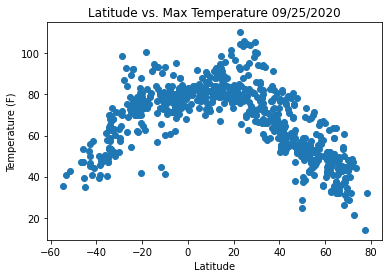

In [10]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Max_Temp"])
plt.title(f"Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
fig.savefig('lat_v_temp.png')
plt.show()

## Latitude vs. Humidity Plot

In [ ]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Humidity"])
plt.title(f"Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
fig.savefig('lat_v_humid.png')
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Cloudiness"])
plt.title(f"Latitude vs Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
fig.savefig('lat_v_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Wind_Speed"])
plt.title(f"Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
fig.savefig('lat_v_wind.png')
plt.show()

## Linear Regression

In [ ]:
# Create separate data frames for the northern and southern hemispheres
north_df=data_df.drop(data_df[data_df['Lat']<0].index,inplace=False)
south_df=data_df.drop(data_df[data_df['Lat']>0].index,inplace=False)
print(f"{len(north_df)} cities in our sample list are in the northern hemisphere")
print(f"{len(south_df)} cities in our sample list are in the southern hemisphere")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Generate scatter plot
plt.scatter(north_df["Max_Temp"], north_df["Lat"])
plt.title(f"Max Temperature vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Max_Temp"], north_df["Lat"])
regress_values = north_df["Max_Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Max_Temp"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Max_Temp"],regress_values,"r-")
plt.annotate(line_eq,(15,0),fontsize=15,color="red")
fig.savefig('temp_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Generate scatter plot
plt.scatter(south_df["Max_Temp"], south_df["Lat"])
plt.title(f"Max Temperature vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Max_Temp"], south_df["Lat"])
regress_values = south_df["Max_Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Max_Temp"], south_df["Lat"])

# Plot regression
plt.plot(south_df["Max_Temp"],regress_values,"r-")
plt.annotate(line_eq,(70,-55),fontsize=15,color="red")
fig.savefig('temp_v_lat_south.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Generate scatter plot
plt.scatter(north_df["Humidity"], north_df["Lat"])
plt.title(f"Humidity vs. Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Humidity"], north_df["Lat"])
regress_values = north_df["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Humidity"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")

fig.savefig('humdity_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Generate scatter plot
plt.scatter(south_df["Humidity"], south_df["Lat"])
plt.title(f"Humidity (%) vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Humidity"], south_df["Lat"])
regress_values = south_df["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Humidity"],south_df["Lat"])

# Plot regression
plt.plot(south_df["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(15, -52),fontsize=15,color="red")
fig.savefig('humdity_v_lat_south.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Generate scatter plot
plt.scatter(north_df["Cloudiness"], north_df["Lat"])
plt.title(f"Cloudiness vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Cloudiness"], north_df["Lat"])
regress_values = north_df["Cloudiness"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Cloudiness"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Cloudiness"],regress_values,"r-")
plt.annotate(line_eq,(5, 75),fontsize=15,color="red")
fig.savefig('cloud_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Generate scatter plot
plt.scatter(south_df["Cloudiness"], south_df["Lat"])
plt.title(f"Cloudiness vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Cloudiness"], south_df["Lat"])
regress_values = south_df["Cloudiness"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Cloudiness"],south_df["Lat"])

# Plot regression
plt.plot(south_df["Cloudiness"],regress_values,"r-")
plt.annotate(line_eq,(0, -55),fontsize=15,color="red")
fig.savefig('cloud_v_lat_south.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Generate scatter plot
plt.scatter(north_df["Wind_Speed"], north_df["Lat"])
plt.title(f"Wind_Speed (mph) vs. Latitude {date}")
plt.xlabel("Wind_Speed (mph)")
plt.ylabel("Latitude")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Wind_Speed"], north_df["Lat"])
regress_values = north_df["Wind_Speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's coefficient
correWind_Speedion = st.pearsonr(north_df["Wind_Speed"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Wind_Speed"],regress_values,"r-")
plt.annotate(line_eq,(16,2),fontsize=15,color="red")
fig.savefig('wind_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Generate scatter plot
plt.scatter(south_df["Wind_Speed"], south_df["Lat"])
plt.title(f"Wind_Speed (mph) vs. Latitude {date}")
plt.xlabel("Wind_Speed (mph)")
plt.ylabel("Latitude")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Wind_Speed"], south_df["Lat"])
regress_values = south_df["Wind_Speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's coefficient
correWind_Speedion = st.pearsonr(south_df["Wind_Speed"],south_df["Lat"])

# Plot regression
plt.plot(south_df["Wind_Speed"],regress_values,"r-")
plt.annotate(line_eq,(18, -50),fontsize=15,color="red")
fig.savefig('humdity_v_lat_south.png')
plt.show()